# Customer Segmentataion Using RFM

# Pareto 80/20 rule: 80% of your company sales come from 20% of your customers.

In [85]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [86]:
#Read data
Rtl_data = pd.read_csv('customer_segmentation.csv', encoding='cp1252')
Rtl_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [87]:
#Check the shape (number of columns and rows) in the dataset
Rtl_data.shape

(541909, 8)

In [88]:
##customer distribution by Country
country_cust_data=Rtl_data[['Country','CustomerID']]
country_cust_data.groupby(['Country'])['CustomerID'].count().reset_index().sort_values('CustomerID',ascending=False)

,Country,CustomerID
36,United Kingdom,361878
14,Germany,9495
13,France,8491
10,EIRE,7485
31,Spain,2533
24,Netherlands,2371
3,Belgium,2069
33,Switzerland,1877
27,Portugal,1480
0,Australia,1259


In [89]:
#Keep only United Kingdom data
Rtl_data = Rtl_data[Rtl_data['Country']=="United Kingdom"]
Rtl_data.shape

(495478, 8)

In [90]:
#Check for missing values in the dataset
Rtl_data.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [91]:
## We have so many null values in customerID which will not help for our project so we will drop them.
Rtl_data = Rtl_data[pd.notnull(Rtl_data['CustomerID'])]


In [92]:
Rtl_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [93]:
Rtl_data.describe()


,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


Insights

1-We have Quantity and Unitprice as a negative values. So we will filter these.

2- We also have some outliers in our dataset.

In [94]:
## Removing Negative and Zero values with Median Values
Rtl_data.loc[Rtl_data['Quantity']<0,"Quantity"] = 4
Rtl_data.loc[Rtl_data['UnitPrice']<=0,"UnitPrice"] = 1.95

In [95]:
Rtl_data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.881363,3.256136,15547.871368
std,188.439187,70.654727,1594.402590
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [96]:
Rtl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361878 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    361878 non-null  object 
 1   StockCode    361878 non-null  object 
 2   Description  361878 non-null  object 
 3   Quantity     361878 non-null  int64  
 4   InvoiceDate  361878 non-null  object 
 5   UnitPrice    361878 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      361878 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


In [97]:
Rtl_data['InvoiceDate'] = pd.to_datetime(Rtl_data['InvoiceDate'])

In [98]:
#Add new column depicting total amount
Rtl_data['TotalAmount'] = Rtl_data['Quantity'] * Rtl_data['UnitPrice']

In [99]:
## Add New columns for Last Purchase date for each customers
Purchase=Rtl_data.groupby('CustomerID').InvoiceDate.max().reset_index()
Purchase.columns=['CustomerID','LastPurchaseDate']
Rtl_data['LastPurchase']=Purchase['LastPurchaseDate'] 

# Frequency  Calaculation

In [100]:
#To calculate Frequency, we calculate the number of purchases for each customer.
#get order counts for each user and create a dataframe with it
Purchase_frequency = Rtl_data.groupby('CustomerID').InvoiceDate.count().reset_index()
Purchase_frequency.columns = ['CustomerID','Buy_Frequency']
Rtl_data['Frequency']=Purchase_frequency['Buy_Frequency'] 

In [101]:
Rtl_data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,LastPurchase,Frequency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2011-01-18 10:17:00,2.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-07 14:34:00,103.0


# Recency Calculation

In [ ]:
# To calculate Recency, we calculate the number of days between present date (i.e. Today)
# and date of last purchase of each customer. 
# We first define today's date and then get the .max() function of InvoiceDate to calculate the number of days between today and date of last purchase.

In [102]:
Rtl_data['Recency'] = (Rtl_data['LastPurchase'].max() - Rtl_data['LastPurchase']).dt.days
Rtl_data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,LastPurchase,Frequency,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2011-01-18 10:17:00,2.0,325.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2011-12-07 14:34:00,103.0,1.0


In [103]:
rfm_columns=['CustomerID','Recency','Frequency','TotalAmount']
df=Rtl_data[rfm_columns]
df.head()

,CustomerID,Recency,Frequency,TotalAmount
0,17850.0,325.0,2.0,15.30
1,17850.0,1.0,103.0,20.34
2,17850.0,0.0,4642.0,22.00
3,17850.0,3.0,231.0,20.34
4,17850.0,2.0,59.0,20.34


In [104]:
df_1=df.copy()

In [105]:
###Saving it
#df.to_csv('rfm_calculation.csv')

In [106]:
df_1.isnull().sum()

CustomerID          0
Recency        359239
Frequency      359239
TotalAmount         0
dtype: int64

In [107]:
df_1 = df_1[pd.notnull(df_1['Frequency'])]
df_1 = df_1[pd.notnull(df_1['Recency'])]

In [108]:
df_1.describe()

,CustomerID,Recency,Frequency,TotalAmount
count,2639.000000,2639.000000,2639.000000,2639.000000
mean,15944.325881,90.030693,91.963244,22.448132
std,1662.781287,99.497541,243.539181,58.029756
min,12748.000000,0.000000,1.000000,0.290000
25%,14606.000000,16.000000,17.000000,4.950000
50%,15923.000000,48.000000,41.000000,12.600000
75%,17850.000000,141.500000,99.500000,19.900000
max,18229.000000,373.000000,7983.000000,1627.200000


# Outlier Treatment

In [109]:
 def plot(df,col):
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    

In [110]:
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier
    plt.subplot(1,2,1)
    sns.distplot(df[col])
    plt.subplot(1,2,2)
    sns.boxplot(df[col])

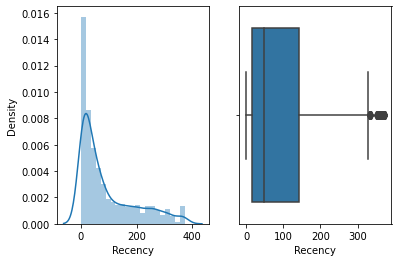

In [111]:
plot(df_1,'Recency')

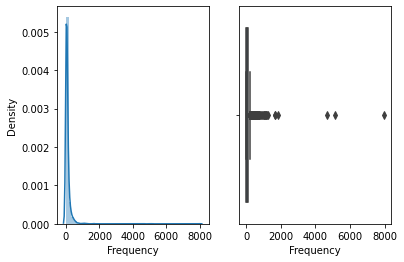

In [112]:
plot(df_1,'Frequency')

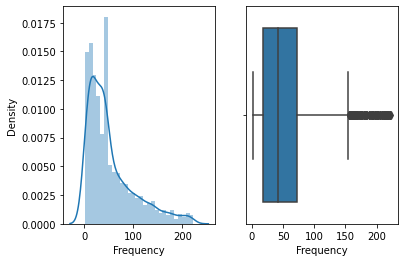

In [113]:
replace_outlier(df_1,'Frequency')

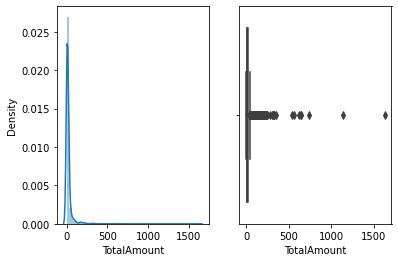

In [114]:
plot(df_1,'TotalAmount')

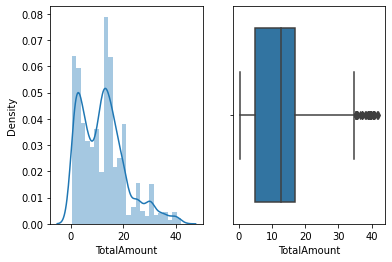

In [115]:
replace_outlier(df_1,'TotalAmount')

In [116]:
df_1.describe()

,CustomerID,Recency,Frequency,TotalAmount
count,2639.000000,2639.000000,2639.000000,2639.000000
mean,15944.325881,90.030693,52.862069,12.296112
std,1662.781287,99.497541,48.965545,8.755669
min,12748.000000,0.000000,1.000000,0.290000
25%,14606.000000,16.000000,17.000000,4.950000
50%,15923.000000,48.000000,41.000000,12.600000
75%,17850.000000,141.500000,72.000000,17.000000
max,18229.000000,373.000000,223.000000,42.000000


##Segmentation Techniques

Now we are going to implement one of them to our business: RFM. RFM stands for Recency - Frequency - Monetary Value. Theoretically we will have segments like below

1-Low Value: Customers who are less active than others, not very frequent buyer/visitor and generates very low - zero - maybe negative revenue.

2-Mid Value: In the middle of everything. Often using our platform (but not as much as our High Values), fairly frequent and generates moderate revenue.

3-High Value: The group we don’t want to lose. High Revenue, Frequency and low Inactivity.

As the methodology, we need to calculate Recency, Frequency and Monetary Value (we will call it Revenue from now on) and apply unsupervised machine learning to identify different groups (clusters) for each.


#Recency = Latest Date - Last Inovice Data,

#Frequency = count of invoice no. of transaction(s), 

#Monetary = Sum of Total 

#Amount for each customer

# Creating  Recency Clusters

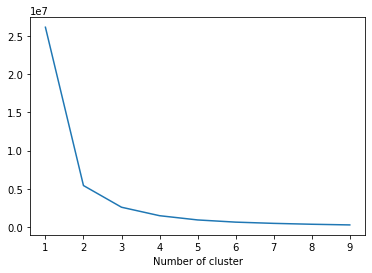

In [117]:
from sklearn.cluster import KMeans

sse={} # error
rec = df_1[['Recency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(rec)
    rec["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [118]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=3)
predicted = kmeans.fit_predict(df_1[['Recency']])
df_1['Recency_Clusters']=predicted

In [119]:
df_1

,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters
0,17850.0,325.0,2.0,15.30,2
1,17850.0,1.0,103.0,20.34,0
2,17850.0,0.0,41.0,22.00,0
3,17850.0,3.0,41.0,20.34,0
4,17850.0,2.0,59.0,20.34,0
...,...,...,...,...,...
3945,15827.0,277.0,10.0,9.95,2
3946,13117.0,180.0,7.0,7.50,1
3947,13117.0,7.0,13.0,7.50,0
3948,13117.0,3.0,41.0,17.70,0


In [120]:
df_1.groupby('Recency_Clusters')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Recency_Clusters,,,,,,,,
0,1768.0,29.861991,24.970161,0.0,8.0,23.0,49.0,91.0
1,500.0,152.800000,38.398188,92.0,119.0,152.0,186.0,222.0
2,371.0,292.169811,44.971892,224.0,254.0,283.0,323.5,373.0


In [121]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

df_1 = order_cluster('Recency_Clusters', 'Recency',df_1,False)

In [122]:
df_1.groupby('Recency_Clusters')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
Recency_Clusters,,,,,,,,
0,371.0,292.169811,44.971892,224.0,254.0,283.0,323.5,373.0
1,500.0,152.800000,38.398188,92.0,119.0,152.0,186.0,222.0
2,1768.0,29.861991,24.970161,0.0,8.0,23.0,49.0,91.0


No handles with labels found to put in legend.


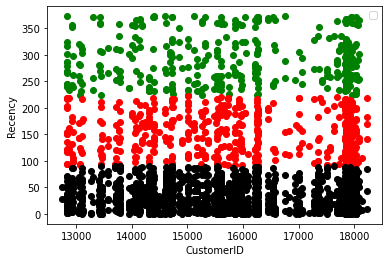

In [123]:
c1 = df_1[df_1.Recency_Clusters==0]
c2 = df_1[df_1.Recency_Clusters==1]
c3 = df_1[df_1.Recency_Clusters==2]
plt.scatter(c1['CustomerID'],c1['Recency'],color='green')
plt.scatter(c2['CustomerID'],c2['Recency'],color='red')
plt.scatter(c3['CustomerID'],c3['Recency'],color='black')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('CustomerID')
plt.ylabel('Recency')
plt.legend()

# Creating Frequency Clusters

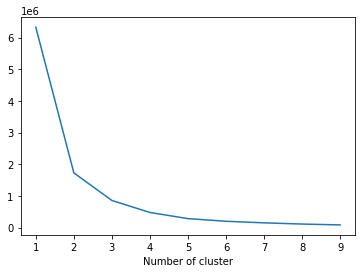

In [124]:
sse={} # error
feq = df_1[['Frequency']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(feq)
    feq["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [125]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
predict_f = kmeans.fit_predict(df_1[['Frequency']])
df_1['Frequency_Clusters']=predict_f

In [126]:
df_1.groupby('Frequency_Clusters')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
Frequency_Clusters,,,,,,,,
0,1127.0,15.133984,8.789464,1.0,8.00,15.0,22.00,31.0
1,418.0,105.074163,18.655574,77.0,88.00,103.0,119.00,141.0
2,896.0,48.375000,11.932211,32.0,41.00,43.0,57.00,76.0
3,198.0,177.686869,24.533473,142.0,156.25,176.0,198.75,223.0


In [127]:
## For monetary and frequency clusters
def order_cluster_2(cluster_field_name, target_field_name,df,decending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending='False').reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [128]:
df_1 = order_cluster_2('Frequency_Clusters', 'Frequency',df_1,False)
df_1.groupby('Frequency_Clusters')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
Frequency_Clusters,,,,,,,,
0,1127.0,15.133984,8.789464,1.0,8.00,15.0,22.00,31.0
1,896.0,48.375000,11.932211,32.0,41.00,43.0,57.00,76.0
2,418.0,105.074163,18.655574,77.0,88.00,103.0,119.00,141.0
3,198.0,177.686869,24.533473,142.0,156.25,176.0,198.75,223.0


No handles with labels found to put in legend.


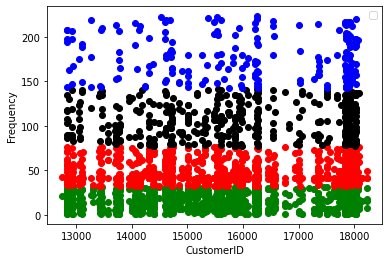

In [129]:
f1 = df_1[df_1.Frequency_Clusters==0]
f2 = df_1[df_1.Frequency_Clusters==1]
f3 = df_1[df_1.Frequency_Clusters==2]
f4 = df_1[df_1.Frequency_Clusters==3]
plt.scatter(f1['CustomerID'],f1['Frequency'],color='green')
plt.scatter(f2['CustomerID'],f2['Frequency'],color='red')
plt.scatter(f3['CustomerID'],f3['Frequency'],color='black')
plt.scatter(f4['CustomerID'],f4['Frequency'],color='blue')
#plt.scatter(f4['CustomerID'],f4['Frequency'],color='blue')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('CustomerID')
plt.ylabel('Frequency')
plt.legend()

In [130]:
df_1.head()

,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters
0,17850.0,325.0,2.0,15.30,0,0
1,13047.0,321.0,12.0,30.00,0,0
2,13047.0,261.0,9.0,25.50,0,0
3,13047.0,282.0,18.0,17.85,0,0
4,17850.0,275.0,7.0,15.30,0,0


# Creating Monetary Clusters

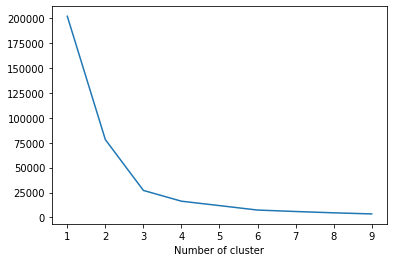

In [131]:
sse={} # error
mon = df_1[['TotalAmount']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(mon)
    mon["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
    sse[k] = kmeans.inertia_ #sse corresponding to clusters
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [132]:
#build 4 clusters for recency and add it to dataframe
kmeans = KMeans(n_clusters=4)
predict_m = kmeans.fit_predict(df_1[['TotalAmount']])
df_1['Monetary_Clusters']=predict_m

In [133]:
df_1.groupby('Monetary_Clusters')['TotalAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Monetary_Clusters,,,,,,,,
0,202.0,32.707129,4.074545,26.40,30.00,30.6,35.4,42.00
1,966.0,12.661408,2.078037,8.25,11.10,12.6,15.0,15.90
2,505.0,19.979842,2.815715,16.35,17.70,19.8,20.4,26.25
3,966.0,3.645818,2.123446,0.29,1.65,3.3,5.1,7.95


In [134]:
df_1 = order_cluster_2('Monetary_Clusters', 'TotalAmount',df_1,False)
df_1.groupby('Monetary_Clusters')['TotalAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Monetary_Clusters,,,,,,,,
0,966.0,3.645818,2.123446,0.29,1.65,3.3,5.1,7.95
1,966.0,12.661408,2.078037,8.25,11.10,12.6,15.0,15.90
2,505.0,19.979842,2.815715,16.35,17.70,19.8,20.4,26.25
3,202.0,32.707129,4.074545,26.40,30.00,30.6,35.4,42.00


No handles with labels found to put in legend.


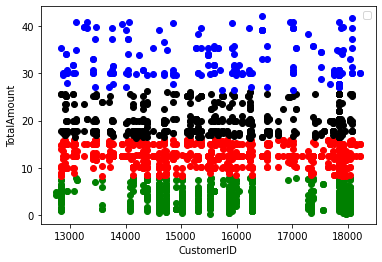

In [135]:
m1 = df_1[df_1.Monetary_Clusters==0]
m2 = df_1[df_1.Monetary_Clusters==1]
m3 = df_1[df_1.Monetary_Clusters==2]
m4 = df_1[df_1.Monetary_Clusters==3]
plt.scatter(m1['CustomerID'],m1['TotalAmount'],color='green')
plt.scatter(m2['CustomerID'],m2['TotalAmount'],color='red')
plt.scatter(m3['CustomerID'],m3['TotalAmount'],color='black')
plt.scatter(m4['CustomerID'],m4['TotalAmount'],color='blue')
#plt.scatter(f4['CustomerID'],f4['Frequency'],color='blue')
#plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('CustomerID')
plt.ylabel('TotalAmount')
plt.legend()

In [136]:
df_1.head()

,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters
0,17850.0,325.0,2.0,15.3,0,0,1
1,17850.0,275.0,7.0,15.3,0,0,1
2,14688.0,300.0,1.0,10.2,0,0,1
3,14688.0,287.0,23.0,15.3,0,0,1
4,15311.0,317.0,7.0,11.9,0,0,1


# Finding Overall RFM Score

In [137]:
## We can add weights based on our business requrement
df_1['RFM_Score']=df_1['Recency_Clusters']+df_1['Frequency_Clusters']+df_1['Monetary_Clusters']
df_1.head()

,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters,RFM_Score
0,17850.0,325.0,2.0,15.3,0,0,1,1
1,17850.0,275.0,7.0,15.3,0,0,1,1
2,14688.0,300.0,1.0,10.2,0,0,1,1
3,14688.0,287.0,23.0,15.3,0,0,1,1
4,15311.0,317.0,7.0,11.9,0,0,1,1


In [138]:
df_1.to_csv('combine_rfm.csv')

<AxesSubplot:title={'center':'Distribution of RFM Score'}, xlabel='RFM_Score', ylabel='count'>

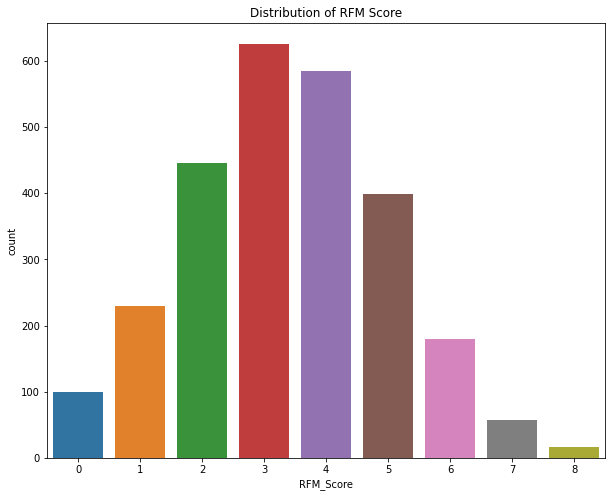

In [139]:
plt.figure(figsize=(10,8))
plt.title("Distribution of RFM Score")
sns.countplot(df_1['RFM_Score'])

In [140]:
df_1.groupby('RFM_Score')['Recency','Frequency','TotalAmount'].mean()

,Recency,Frequency,TotalAmount
RFM_Score,,,
0,295.760000,13.570000,3.605800
1,224.213043,15.530435,7.712391
2,133.103139,22.190583,8.735852
3,77.412141,36.482428,10.324010
4,49.271795,58.140171,13.066051
5,33.879699,88.010025,16.527870
6,25.312849,120.039106,20.678603
7,23.929825,146.350877,25.766316
8,22.647059,169.529412,32.210588


In [141]:
df_1['RFM_Score'].describe()

count    2639.000000
mean        3.389163
std         1.628421
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         8.000000
Name: RFM_Score, dtype: float64

# Applying  K-Means Clustering


In [142]:
df_1[['Frequency','TotalAmount','Recency']].skew()

Frequency      1.429544
TotalAmount    0.864217
Recency        1.244572
dtype: float64

In [143]:
df_1[['Frequency','TotalAmount','Recency']].describe()

,Frequency,TotalAmount,Recency
count,2639.000000,2639.000000,2639.000000
mean,52.862069,12.296112,90.030693
std,48.965545,8.755669,99.497541
min,1.000000,0.290000,0.000000
25%,17.000000,4.950000,16.000000
50%,41.000000,12.600000,48.000000
75%,72.000000,17.000000,141.500000
max,223.000000,42.000000,373.000000


In [144]:
df_1['Recency']=np.where(df_1['Recency']==0,1,df_1['Recency'])

# With Data Transformation

In [145]:
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = df_1[['Recency','Frequency', 'TotalAmount']].apply(np.log, axis = 1).round(3)

In [146]:
Log_Tfd_Data.skew()

Recency       -0.616086
Frequency     -0.760425
TotalAmount   -0.842837
dtype: float64

In [147]:
Log_Tfd_Data.head()

,Recency,Frequency,TotalAmount
0,5.784,0.693,2.728
1,5.617,1.946,2.728
2,5.704,0.000,2.322
3,5.659,3.135,2.728
4,5.759,1.946,2.477


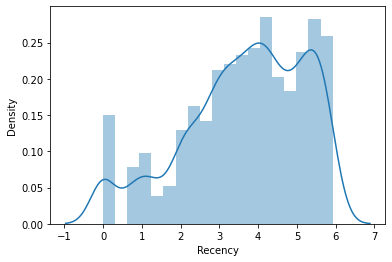

In [148]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

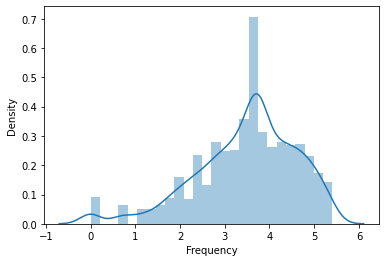

In [149]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

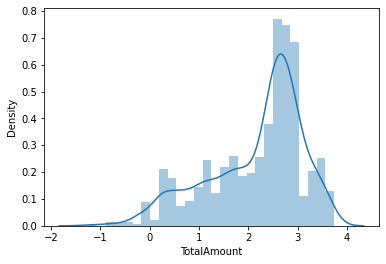

In [150]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data.query('TotalAmount < 10000')['TotalAmount']
ax = sns.distplot(Monetary_Plot)

In [151]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
ss = StandardScaler()
Scaled_Data = ss.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = df_1.index, columns = Log_Tfd_Data.columns)

In [152]:
Scaled_Data

,Recency,Frequency,TotalAmount
0,1.370829,-2.477334,0.591655
1,1.263433,-1.362545,0.591655
2,1.319382,-3.093894,0.168823
3,1.290443,-0.304696,0.591655
4,1.354751,-1.362545,0.330249
...,...,...,...
2634,-0.183515,1.606371,-0.322745
2635,0.860217,1.526299,-1.122585
2636,0.606197,1.505836,-2.017197
2637,0.740602,1.569894,-0.552908


In [153]:
Scaled_df=Scaled_Data.copy()

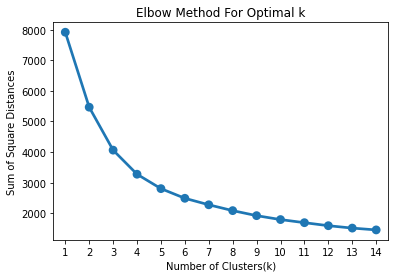

In [154]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [155]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
Log_Tfd_Data['Cluster'] = KMean_clust.labels_
Log_Tfd_Data.head(6)

,Recency,Frequency,TotalAmount,Cluster
0,5.784,0.693,2.728,2
1,5.617,1.946,2.728,2
2,5.704,0.000,2.322,2
3,5.659,3.135,2.728,2
4,5.759,1.946,2.477,2
5,5.775,2.708,2.472,2


<Figure size 504x504 with 0 Axes>

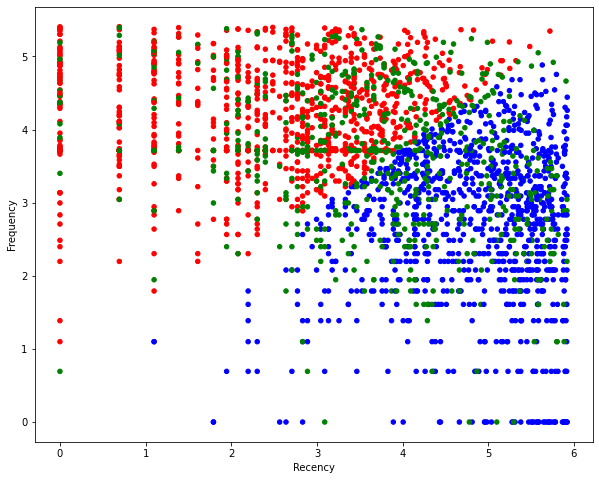

In [156]:
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
Log_Tfd_Data['Color'] = Log_Tfd_Data['Cluster'].map(lambda p: Colors[p])
ax = Log_Tfd_Data.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = Log_Tfd_Data['Color']
)

In [158]:
from sklearn.metrics import silhouette_score


In [159]:
score = silhouette_score(Scaled_Data, KMean_clust.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)


### Overlapping

Silhouetter Score: 0.308


# Without Transformation

In [160]:
raw_data=df_1[['Recency','Frequency','TotalAmount']]
raw_data.head()

,Recency,Frequency,TotalAmount
0,325.0,2.0,15.3
1,275.0,7.0,15.3
2,300.0,1.0,10.2
3,287.0,23.0,15.3
4,317.0,7.0,11.9


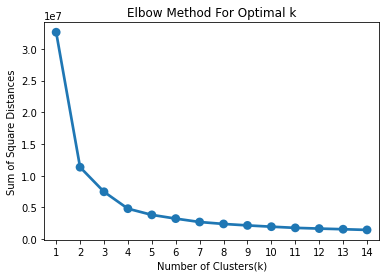

In [161]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(raw_data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [162]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(raw_data)

#Find the clusters for the observation given in the dataset
raw_data['raw_Cluster'] = KMean_clust.labels_
raw_data.head(6)

,Recency,Frequency,TotalAmount,raw_Cluster
0,325.0,2.0,15.30,0
1,275.0,7.0,15.30,0
2,300.0,1.0,10.20,0
3,287.0,23.0,15.30,0
4,317.0,7.0,11.90,0
5,322.0,15.0,11.85,0


<AxesSubplot:xlabel='Recency', ylabel='Frequency'>

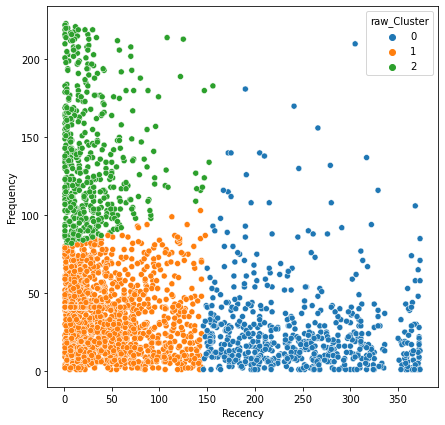

In [163]:
plt.figure(figsize=(7,7))
sns.scatterplot(raw_data['Recency'],raw_data['Frequency'],hue='raw_Cluster',data=raw_data,palette="tab10")

In [164]:
score = silhouette_score(raw_data, KMean_clust.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.488


# Applying PCA

In [165]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(Scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,2.757689,-0.379223
1,1.896126,-0.449548
2,3.124163,0.075959
3,1.169494,-0.510081
4,1.940837,-0.184500
...,...,...
2634,-1.286084,0.219100
2635,-0.553766,1.071526
2636,-0.785900,1.952550
2637,-0.625939,0.495181


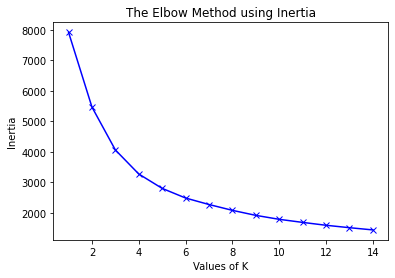

In [166]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(Scaled_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()

In [167]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(Scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

In [168]:
pca_df_kmeans

,PCA1,PCA2,cluster
0,2.757689,-0.379223,2
1,1.896126,-0.449548,2
2,3.124163,0.075959,2
3,1.169494,-0.510081,2
4,1.940837,-0.184500,2
...,...,...,...
2634,-1.286084,0.219100,1
2635,-0.553766,1.071526,0
2636,-0.785900,1.952550,0
2637,-0.625939,0.495181,1


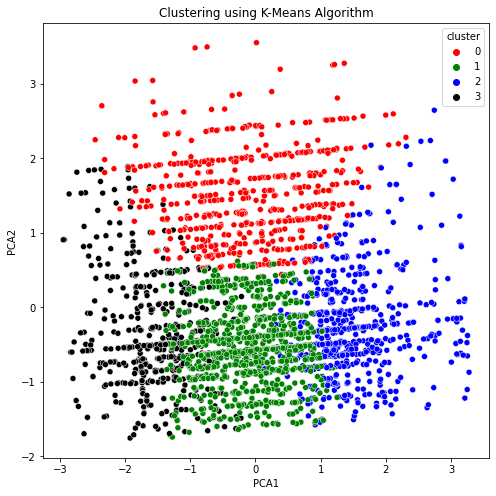

In [169]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [170]:
score = silhouette_score(Scaled_df, kmeans_model.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.286


# Hierarchical clustering

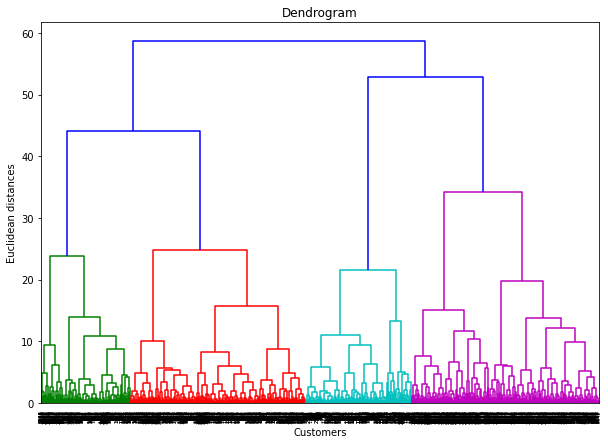

In [171]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))


dendrogram = sch.dendrogram(sch.linkage(Scaled_Data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#check for largest distance vertically without crossing any horizontal line

In [172]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
agg.fit_predict(Scaled_Data)

array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [173]:
score = silhouette_score(Scaled_df, agg.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.225


# DBSCAN Clustering

In [199]:
Scaled_Data

,Recency,Frequency,TotalAmount
0,1.370829,-2.477334,0.591655
1,1.263433,-1.362545,0.591655
2,1.319382,-3.093894,0.168823
3,1.290443,-0.304696,0.591655
4,1.354751,-1.362545,0.330249
...,...,...,...
2634,-0.183515,1.606371,-0.322745
2635,0.860217,1.526299,-1.122585
2636,0.606197,1.505836,-2.017197
2637,0.740602,1.569894,-0.552908


In [200]:
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(Scaled_Data) ## Checked with Scaled_df
labels = db_default.labels_
Log_Tfd_Data["db_check"] = labels

In [201]:
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores[db_default.core_sample_indices_]=True
#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)

print(n_clusters)

18


In [203]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
print(metrics.silhouette_score(Scaled_Data,labels))


-0.4543406006842168


# Segmentation based on RFM Score

In [ ]:
## We can add weights based on our business requrement
# df_1['RFM_Score']=df_1['Recency_Clusters']+df_1['Frequency_Clusters']+df_1['Monetary_Clusters']
# df_1.head()

In [175]:
df_1.head(2)


,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters,RFM_Score
0,17850.0,325.0,2.0,15.3,0,0,1,1
1,17850.0,275.0,7.0,15.3,0,0,1,1


In [176]:
df_1['RFM_Loyalty_Level'] = 'Bronze'
df_1.loc[df_1['RFM_Score']>=2,'RFM_Loyalty_Level'] = 'Silver' 
df_1.loc[df_1['RFM_Score']>=4,'RFM_Loyalty_Level'] = 'Gold'
df_1.loc[df_1['RFM_Score']>=6,'RFM_Loyalty_Level'] = 'Platinum'

In [177]:
df_1.head()

,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters,RFM_Score,RFM_Loyalty_Level
0,17850.0,325.0,2.0,15.3,0,0,1,1,Bronze
1,17850.0,275.0,7.0,15.3,0,0,1,1,Bronze
2,14688.0,300.0,1.0,10.2,0,0,1,1,Bronze
3,14688.0,287.0,23.0,15.3,0,0,1,1,Bronze
4,15311.0,317.0,7.0,11.9,0,0,1,1,Bronze


In [178]:
# #Assign Loyalty Level to each customer
# Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
# Score_cuts = pd.qcut(df_1.RFM_Score, q = 4, labels = Loyalty_Level)
# df_1['RFM_Loyalty_Level'] = Score_cuts.values
# df_1.reset_index().head()

In [179]:
#Validate the data for RFMGroup = 111
df_1['RFM_Loyalty_Level'].value_counts()

Silver      1072
Gold         984
Bronze       330
Platinum     253
Name: RFM_Loyalty_Level, dtype: int64

In [180]:
High_valued=df_1[df_1['RFM_Loyalty_Level']=='Platinum']
Medium_valued=df_1[df_1['RFM_Loyalty_Level']=='Gold']
Low_valued=df_1[df_1['RFM_Loyalty_Level']=='Silver'] 
Churn_cust=df_1[df_1['RFM_Loyalty_Level']=='Bronze']

In [181]:
High_valued
#High_valued.to_csv("High_valued.csv")

,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters,RFM_Score,RFM_Loyalty_Level
899,13748.0,3.0,154.0,12.60,2,3,1,6,Platinum
900,14688.0,30.0,219.0,13.20,2,3,1,6,Platinum
901,14527.0,1.0,222.0,12.60,2,3,1,6,Platinum
902,17511.0,4.0,142.0,12.60,2,3,1,6,Platinum
903,17511.0,15.0,174.0,12.60,2,3,1,6,Platinum
...,...,...,...,...,...,...,...,...,...
1668,17850.0,11.0,213.0,25.50,2,3,2,7,Platinum
1669,15544.0,3.0,166.0,19.80,2,3,2,7,Platinum
1670,15738.0,11.0,164.0,17.70,2,3,2,7,Platinum
1671,15827.0,6.0,177.0,17.70,2,3,2,7,Platinum


In [183]:
Medium_valued
# Medium_valued.to_csv("Medium_valued.csv")

,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters,RFM_Score,RFM_Loyalty_Level
442,13047.0,2.0,56.0,12.60,2,1,1,4,Gold
443,13047.0,37.0,39.0,9.90,2,1,1,4,Gold
444,13047.0,4.0,41.0,14.85,2,1,1,4,Gold
445,13047.0,69.0,34.0,14.85,2,1,1,4,Gold
446,17850.0,17.0,49.0,11.10,2,1,1,4,Gold
...,...,...,...,...,...,...,...,...,...
2634,17850.0,29.0,197.0,6.36,2,3,0,5,Gold
2635,15525.0,147.0,180.0,2.95,1,3,0,4,Gold
2636,14606.0,99.0,176.0,1.25,1,3,0,4,Gold
2637,18011.0,122.0,189.0,5.10,1,3,0,4,Gold


In [184]:
Low_valued
# Low_valued.to_csv("Low_valued.csv")

,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters,RFM_Score,RFM_Loyalty_Level
101,17850.0,74.0,5.0,11.10,2,0,1,3,Silver
102,17850.0,59.0,25.0,11.10,2,0,1,3,Silver
103,13047.0,5.0,25.0,12.60,2,0,1,3,Silver
104,13047.0,31.0,27.0,14.85,2,0,1,3,Silver
105,17850.0,44.0,12.0,11.10,2,0,1,3,Silver
...,...,...,...,...,...,...,...,...,...
2556,16274.0,156.0,93.0,4.20,1,2,0,3,Silver
2557,18011.0,158.0,90.0,5.10,1,2,0,3,Silver
2558,18041.0,95.0,120.0,0.85,1,2,0,3,Silver
2559,18041.0,152.0,134.0,0.65,1,2,0,3,Silver


In [185]:
Churn_cust
#Churn_cust.to_csv("Churn_cust.csv")

,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters,RFM_Score,RFM_Loyalty_Level
0,17850.0,325.0,2.0,15.30,0,0,1,1,Bronze
1,17850.0,275.0,7.0,15.30,0,0,1,1,Bronze
2,14688.0,300.0,1.0,10.20,0,0,1,1,Bronze
3,14688.0,287.0,23.0,15.30,0,0,1,1,Bronze
4,15311.0,317.0,7.0,11.90,0,0,1,1,Bronze
...,...,...,...,...,...,...,...,...,...
2089,16274.0,226.0,62.0,2.50,0,1,0,1,Bronze
2090,16274.0,252.0,41.0,2.55,0,1,0,1,Bronze
2091,14606.0,266.0,37.0,2.95,0,1,0,1,Bronze
2092,13576.0,313.0,71.0,5.95,0,1,0,1,Bronze


In [186]:
Churn_cust.groupby('Recency_Clusters')['Recency'].describe().reset_index()

,Recency_Clusters,count,mean,std,min,25%,50%,75%,max
0,0,217.0,292.723502,45.603231,224.0,253.0,286.0,324.0,373.0
1,1,113.0,155.964602,37.658695,92.0,121.0,154.0,191.0,222.0


In [189]:
df_1.head(5)

,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters,RFM_Score,RFM_Loyalty_Level
0,17850.0,325.0,2.0,15.3,0,0,1,1,Bronze
1,17850.0,275.0,7.0,15.3,0,0,1,1,Bronze
2,14688.0,300.0,1.0,10.2,0,0,1,1,Bronze
3,14688.0,287.0,23.0,15.3,0,0,1,1,Bronze
4,15311.0,317.0,7.0,11.9,0,0,1,1,Bronze


In [190]:
df_m=df_1.copy()

In [191]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_m['RFM_Loyalty_Level']=le.fit_transform(df_m['RFM_Loyalty_Level'])

In [192]:
df_m.head(2)

,CustomerID,Recency,Frequency,TotalAmount,Recency_Clusters,Frequency_Clusters,Monetary_Clusters,RFM_Score,RFM_Loyalty_Level
0,17850.0,325.0,2.0,15.3,0,0,1,1,0
1,17850.0,275.0,7.0,15.3,0,0,1,1,0


# Building Machine Learning Model

In [193]:
from sklearn.model_selection import train_test_split
X = df_m.drop(['CustomerID','RFM_Loyalty_Level'],axis=1)
y = df_m['RFM_Loyalty_Level']


In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score,classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV

In [195]:
## For Classification
def best_model(clf,X,y):  
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=44,stratify=y)
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    print("accuracy score:", accuracy_score(y_test,pred))
    print("Training Score:",clf.score(x_train,y_train))
    print("Testing Score:",clf.score(x_test,y_test))
    print("Cross Val Accuracy:",cross_val_score(clf,X,y,scoring="accuracy",cv=7).mean())
    print('Standard Division:',cross_val_score(clf,X,y,scoring="accuracy",cv=7).std())
    print("************************************************************************************")
    #prob=clf.predict_proba(x_test)[:,1]
    #print("Roc_Auc score:",roc_auc_score(y_test,prob))
    #print("Precision score:",precision_score(y_test,pred))
    #print("Recall Score:",recall_score(y_test,pred))
    #print("F1 Score",f1_score(y_test,pred))
    print("**************************************************************************************")
    print("Confusion matrix")
    print(confusion_matrix(y_test,pred))
    cm=confusion_matrix(y_test,pred)
    print("Classification Report")
    print(classification_report(y_test,pred))
    #Fpr,Tpr,thresholds=roc_curve(y_test,prob,pos_label=True)

    #plotting the graph for area under curve for representing accuracy of data
    #plt.plot([0,1],[1,0],'g--')
    #plt.plot(Fpr,Tpr)
    #plt.xlabel('False_Positive_Rate')
    #plt.ylabel('True_Positive_Rate')
    #plt.title( clf +"Classifier")
    #plt.show()

In [196]:
## Random Forest Model
lr=LogisticRegression()
best_model(lr,X,y)

accuracy score: 0.8371212121212122
Training Score: 0.8318332543818096
Testing Score: 0.8371212121212122
Cross Val Accuracy: 0.795377036756347
Standard Division: 0.05817306877573471
************************************************************************************
**************************************************************************************
Confusion matrix
[[ 51   0   0  15]
 [  0 171  10  16]
 [  0  16  35   0]
 [  8  21   0 185]]
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.77      0.82        66
           1       0.82      0.87      0.84       197
           2       0.78      0.69      0.73        51
           3       0.86      0.86      0.86       214

    accuracy                           0.84       528
   macro avg       0.83      0.80      0.81       528
weighted avg       0.84      0.84      0.84       528



In [92]:
## The above graph shows a good segmentation so we will go with it.
# cluster_1_df = df_1[cluster_df["raw_Cluster"]==0]
# cluster_1_df
# cluster_1_df = df_1[cluster_df["raw_Cluster"]==1]
# cluster_1_df
# cluster_1_df = df_1[cluster_df["raw_Cluster"]==1]
# cluster_1_df

In [98]:
# sse={} # error
# mon = df_1[['TotalAmount']]
# for k in range(1, 10):
#     kmeans = KMeans(n_clusters=k, max_iter=1000).fit(mon)
#     mon["clusters"] = kmeans.labels_  #cluster names corresponding to recency values 
#     sse[k] = kmeans.inertia_ #sse corresponding to clusters
# plt.figure()
# plt.plot(list(sse.keys()), list(sse.values()))
# plt.xlabel("Number of cluster")
# plt.show()